In [ ]:
import pandas as pd

In [ ]:
# from google.colab import drive
#drive.mount('/content/drive')

train = pd.read_csv("/content/drive/MyDrive/Datasets/trainSet.csv")
test = pd.read_csv("/content/drive/MyDrive/Datasets/testSet.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head(6)

,Index,x1,x2,y
0,1,0.346,0.780,0
1,2,0.303,0.439,0
2,3,0.358,0.729,0
3,4,0.602,0.863,1
4,5,0.790,0.753,1
5,6,0.611,0.965,1


In [ ]:
test.head(6)

,Index,x1,x2,y
0,1,0.959,0.382,0
1,2,0.750,0.306,0
2,3,0.395,0.760,0
3,4,0.823,0.764,1
4,5,0.761,0.874,1
5,6,0.844,0.435,1


In [ ]:
import numpy as np


In [ ]:
x=train.iloc[:,[1,2]].values##returns a dataframe
y=train.iloc[:,3].values ##returns vector

x

array([[0.346, 0.78 ],
       [0.303, 0.439],
       [0.358, 0.729],
       [0.602, 0.863],
       [0.79 , 0.753],
       [0.611, 0.965]])

In [ ]:
y

array([0, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)


LogisticRegression()

In [ ]:
X=test.iloc[:,[1,2]].values
Y=test.iloc[:,3].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
y_pred = log.predict(X_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[0, 1],
       [0, 1]])

In [ ]:
accuracy = np.mean(y_pred == y_test)
precision = np.sum(y_pred[y_test == 1]) / np.sum(y_pred)
recall = np.sum(y_pred[y_test == 1]) / np.sum(y_test)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5
Precision: 0.5
Recall: 1.0


Take a logistic regression kaggle dataset and train the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/titanic_test.csv")
train = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

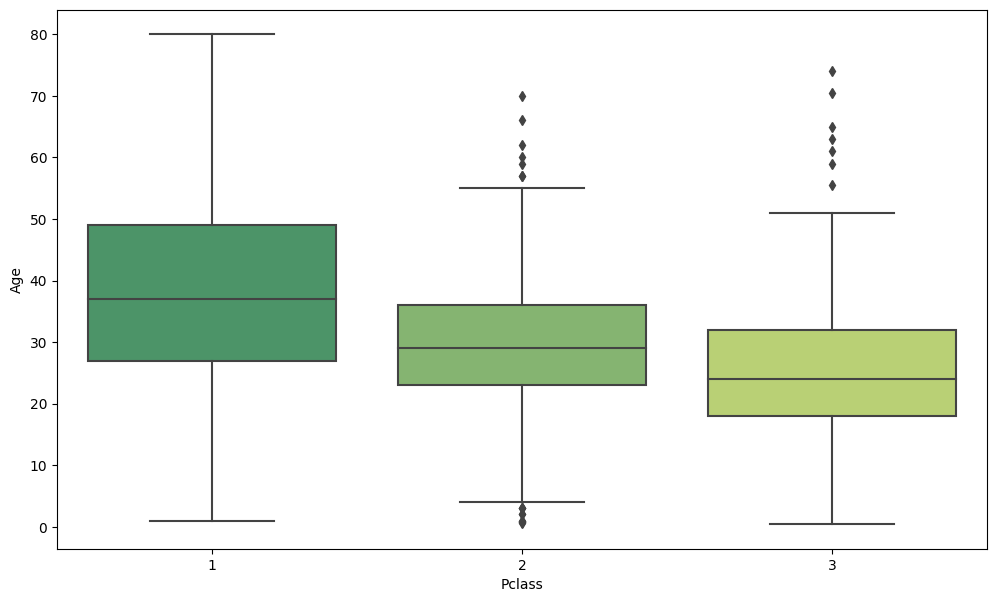

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer') ##this curvr shows that people on top floor(1) got saved and they belonged to the age group above 30

In [ ]:
def impute_age(cols):##here we are only predicting age
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)##age column is also complete now

In [ ]:
train.drop('Cabin',axis=1,inplace=True)##inplace = True is commit

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train=pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()##we get a complete numerical data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions=logmodel.predict(X_test)

In [ ]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[133  21]
 [ 42  72]]
